# 金风风速预测

In [1]:
%matplotlib inline

### 一、业务理解

**风速预测:** 风力发电直接接入国家电网，需要准确预报发电功率以保持电压平稳、**减少能源浪费**，且预报偏差大会受到财务**处罚**

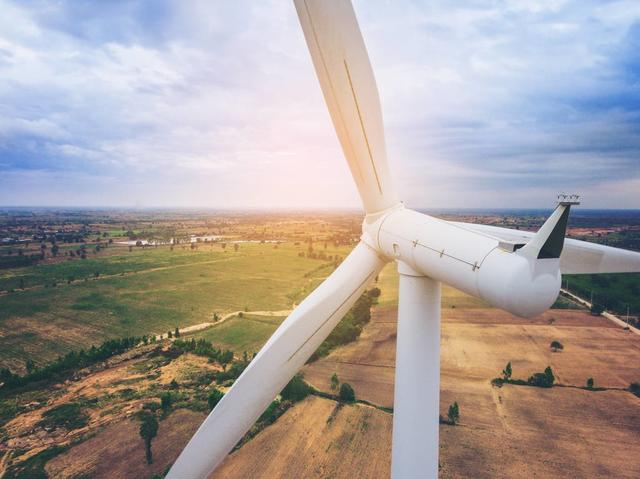

In [2]:
from IPython.display import Image
Image(filename='../../resources/img/wind_turbine.jpeg', width=320)

### 二、数据理解

1. 历史风场平均风速观测记录
    * 广西一年多的数据，数据间隔15分钟
    * 新疆四年多的数据，数据间隔15分钟
2. 风场气象数值预报
    * 广西和新疆
    * 各4份不同的气象源数据
    * 以“广西EC气象源“数据为例，共有67105行数据，每条数据共有包含时间戳的36个特征

<AxesSubplot:title={'center':'GuangXi wind speed'}, xlabel='date'>

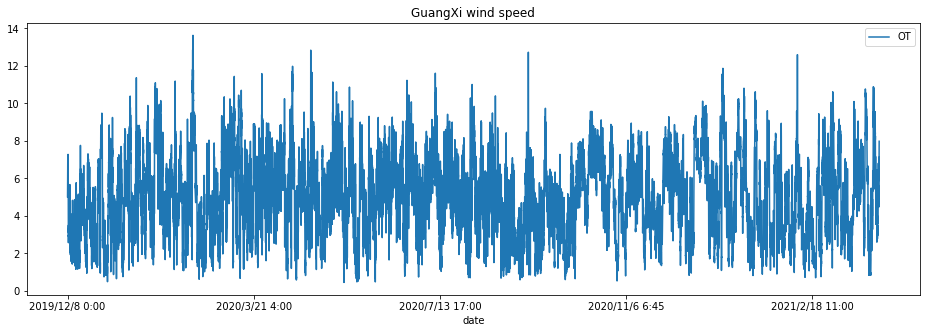

In [3]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

df = pd.read_csv("../../resources/jinfeng_guangxi/wind_guangxi.csv",
                 index_col=0)
df.plot(title="GuangXi wind speed", figsize=(16, 5))

### 三、数据准备

1. 数据格式处理，调整时间戳格式为标准时序算法库读入格式。创建对应csv文件。该csv文件为目前时序预测使用的主要文件。
2. 数据清洗，删去csv文件中数值为空的记录。在保证时序数据严格排列的基础上，尽量使数据等间隔排列。
3. 数据合并，将各地风速记录和气象源数据合并起来，在保证时间戳绝对一致且严格排序的基础上，尽可能保留多的等间隔数据。此外，由于同一地方4个预测的气象源数据之间存在出入，我们尝试首先将其4个预测值求平均然和与风速进行合并并生成最终的数据csv文件。（该文件目前暂未使用）

### 四、模型建立

tranformer时序预测
* 本地无封装的生算法
* 本地数据集

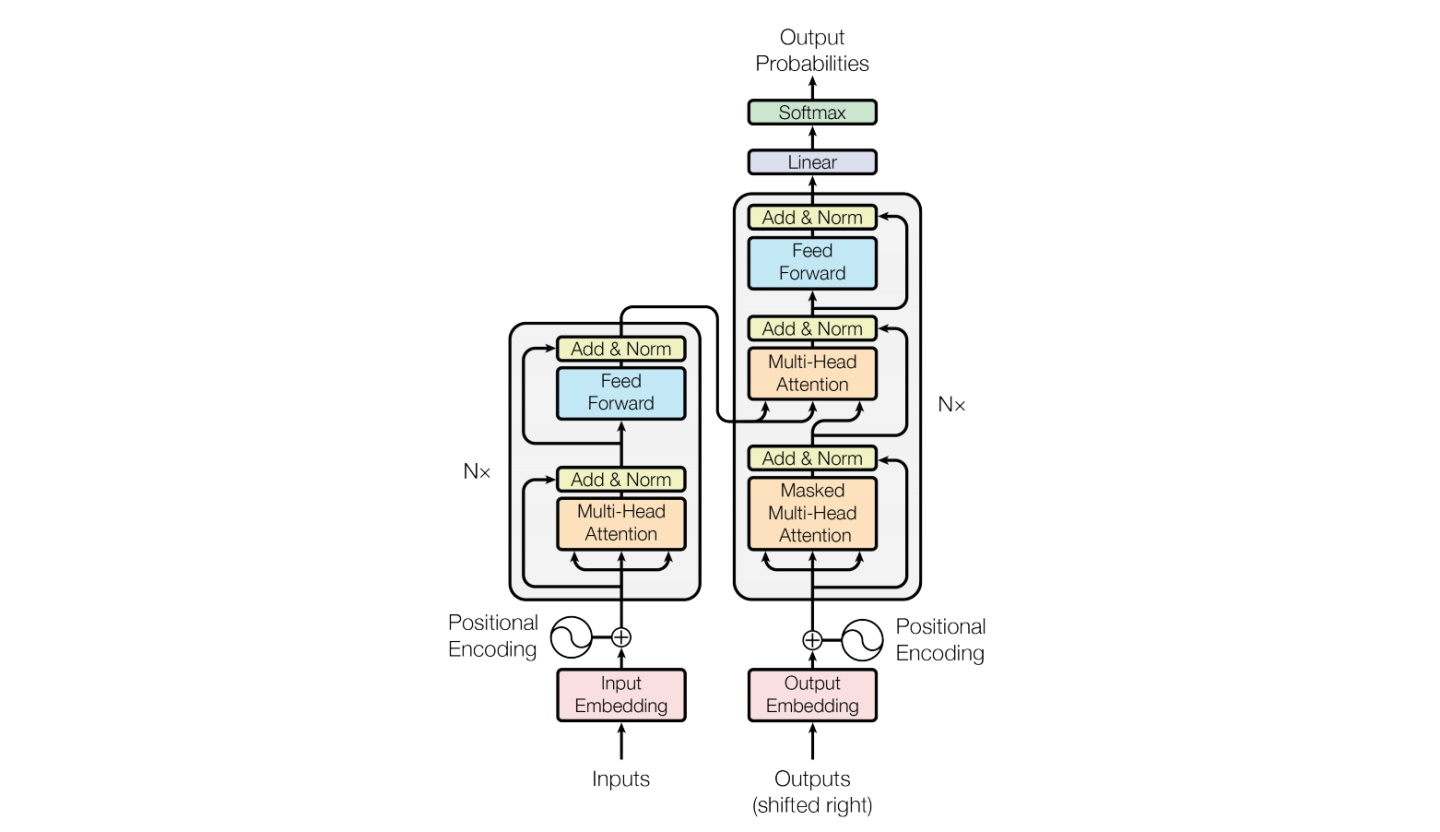

In [4]:
Image(filename='../../resources/img/transformer.jpeg') 

#### 1 - 初始化SDK与Anylearn后端引擎连接

In [5]:
from anylearn.config import init_sdk
init_sdk('http://192.168.10.22:31888', 'xlearn', '123456')

#### 2 - 调用SDK快速训练

In [6]:
from anylearn.applications.quickstart import quick_train
train_task, algo, dset, project = quick_train(
    algorithm_dir="../../resources/transformer",
    dataset_dir="../../resources/jinfeng_guangxi",
    entrypoint="python -u main_informer.py",
    output="output_model",
    dataset_hyperparam_name="data_path",
    hyperparams={
        'is_training': '1',
        'root_path': '.',
        'data_path': 'wind_guangxi.csv',
        'model_id': 'wind_guangxi_96',
        'model': 'transformer',
        'data': 'custom',
        'features': 'M',
        'seq_len': '336',
        'label_len': '198',
        'pred_len': '96',
        'enc_in': ' 1',
        'dec_in': ' 1',
        'c_out': '  1',
        'e_layers': '3',
        'd_layers': '2',
        'attn': 'prob',
        'des': 'Exp',
        'itr': '1',
     },
    gpu_num=1,
)
train_task

TrainTask(name='7m3lt5u4', description='', state=0, visibility=1, creator_id='USERfb6c6d2111eaadda13fd17feeac7', owner=['USERfb6c6d2111eaadda13fd17feeac7'], project_id=None, algorithm_id='ALGO6f46a33311eb872cb22c75dd00d0', train_params='{"data_path": "wind_guangxi.csv", "is_training": "1", "root_path": ".", "model_id": "wind_guangxi_96", "model": "transformer", "data": "custom", "features": "M", "seq_len": "336", "label_len": "198", "pred_len": "96", "enc_in": " 1", "dec_in": " 1", "c_out": "  1", "e_layers": "3", "d_layers": "2", "attn": "prob", "des": "Exp", "itr": "1"}', files='DSET4caea33311eb872cb22c75dd00d0', results_id='FILE5e38a33311eb872cb22c75dd00d0', secret_key='TKEYb77ea33311eb872cb22c75dd00d0', create_time='2021-04-22 14:23:48', finish_time='', envs='', gpu_num=1, hpo=False, hpo_search_space=None, final_metric=None, id='TRAI3346a33311eb872cb22c75dd00d0')

#### 3 - 跟踪训练进度

In [7]:
import time

status = train_task.get_status()
while 'state' not in status:
    print("Waiting...")
    time.sleep(120)
    status = train_task.get_status()
while status['state'] not in ["success", "fail"]:
    if 'process' in status:
        print(f"Progress: {int(100 * float(status['process']))}%")
    else:
        print(status['state'])
    try:
        print(f"-- last metric: {train_task.get_intermediate_metric()[-1]['metric']}")
    except:
        print(f"-- no metric yet")
    time.sleep(300)
    status = train_task.get_status()
    print(status)
print(f"Final metric: {train_task.get_final_metric()}")
status['state']

Waiting...
working
-- no metric yet
{'ip': '10.244.2.245', 'secret_key': 'TKEYb77ea33311eb872cb22c75dd00d0', 'state': 'working'}
working
-- last metric: {'id': 'METRcbfea33511eb872cb22c75dd00d0', 'metric': -1.5579650402069092, 'train_task_id': 'TRAI3346a33311eb872cb22c75dd00d0'}
{'ip': '10.244.2.245', 'secret_key': 'TKEYb77ea33311eb872cb22c75dd00d0', 'state': 'working'}
working
-- last metric: {'id': 'METRcbfea33511eb872cb22c75dd00d0', 'metric': -1.5579650402069092, 'train_task_id': 'TRAI3346a33311eb872cb22c75dd00d0'}
{'ip': '10.244.2.245', 'secret_key': 'TKEYb77ea33311eb872cb22c75dd00d0', 'state': 'working'}
working
-- last metric: {'id': 'METRd33ea33611eb872cb22c75dd00d0', 'metric': -1.646214485168457, 'train_task_id': 'TRAI3346a33311eb872cb22c75dd00d0'}
{'ip': '10.244.2.245', 'secret_key': 'TKEYb77ea33311eb872cb22c75dd00d0', 'state': 'success'}
Final metric: {'final_metric': -1.6970630884170532, 'id': 'TRAI3346a33311eb872cb22c75dd00d0', 'name': '7m3lt5u4'}


'success'

### 五、模型验证

#### 1 - 导出训练结果

In [8]:
train_task.get_detail()

from pathlib import Path
import shutil

from anylearn.interfaces.resource import SyncResourceDownloader

workdir = Path("../../_tmp/")

downloader = SyncResourceDownloader()
res = train_task.download_results(save_path=workdir,
                                  downloader=downloader)
shutil.unpack_archive(workdir / res, workdir / train_task.id, format="zip")

#### 2 - 调用SDK快速验证

In [9]:
from anylearn.applications.quickstart import quick_evaluate
eval_task, algo, model, dset = quick_evaluate(
    model_dir=workdir / train_task.id / "output_model",
    algorithm_id=algo.id,
    dataset_dir=dset.id,
    entrypoint="python -u main_informer.py",
    output="results.txt",
    model_hyperparam_name="model_path",
    dataset_hyperparam_name="data_path",
    hyperparams={
        'is_training': '0',
        'root_path': '.',
        'data_path': 'wind_guangxi.csv',
        'model_id': 'wind_guangxi_96',
        'model': 'transformer',
        'data': 'custom',
        'features': 'M',
        'seq_len': '336',
        'label_len': '198',
        'pred_len': '96',
        'enc_in': ' 1',
        'dec_in': ' 1',
        'c_out': '  1',
        'e_layers': '3',
        'd_layers': '2',
        'attn': 'prob',
        'des': 'Exp',
        'itr': '1',
    },
    gpu_num=1,
)
eval_task

EvaluateTask(id='EVAL6c58a33711eb872cb22c75dd00d0', name='ja6k74su', description='', state=0, visibility=1, creator_id='USERfb6c6d2111eaadda13fd17feeac7', owner=['USERfb6c6d2111eaadda13fd17feeac7'], create_time='2021-04-22 14:53:41', finish_time='', params_list='[{"id": null, "model_id": "MODE45b4a33711eb872cb22c75dd00d0", "files": "DSETf32aa33711eb872cb22c75dd00d0", "evaluate_params": {"model_path": "$MODE45b4a33711eb872cb22c75dd00d0", "data_path": "wind_guangxi.csv", "is_training": "0", "root_path": ".", "model_id": "wind_guangxi_96", "model": "transformer", "data": "custom", "features": "M", "seq_len": "336", "label_len": "198", "pred_len": "96", "enc_in": " 1", "dec_in": " 1", "c_out": "  1", "e_layers": "3", "d_layers": "2", "attn": "prob", "des": "Exp", "itr": "1"}, "envs": "", "gpu_num": 1, "results": null}]', sub_tasks=[EvaluateSubTask(id='EVRE6986a33711eb872cb22c75dd00d0', model_id='MODE45b4a33711eb872cb22c75dd00d0', files=['DSETf32aa33711eb872cb22c75dd00d0'], evaluate_params=

#### 3 - 跟踪验证结果

In [10]:
import json
import time

from anylearn.interfaces import EvaluateTaskState

while eval_task.state not in [EvaluateTaskState.SUCCESS, EvaluateTaskState.FAIL]:
    print("WORKING...")
    time.sleep(120)
    eval_task.get_detail()
res = eval_task.sub_tasks[0].results
res = json.loads(res)
f"MAE={res[0]}, MSE={res[1]}, RMSE={res[2]}, MAPE={res[3]}, MSPE={res[4]}"

WORKING...
WORKING...


'MAE=1.9592946955906752, MSE=6.217175084725923, RMSE=2.49342637443457, MAPE=0.5393837645906873, MSPE=0.6894764815213386'

#### 4 - 样例预测结果 (1)

(96, 1) (96, 1)


<AxesSubplot:>

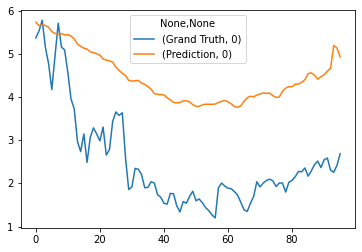

In [11]:
truth = np.load(workdir / train_task.id / "output_model/results/true.npy")
pred = np.load(workdir / train_task.id / "output_model/results/pred.npy")
df_t = pd.DataFrame(truth[0])
df_p = pd.DataFrame(pred[0])
print(df_t.shape, df_p.shape)
df = pd.concat({"Grand Truth": df_t, "Prediction": df_p}, axis=1)
df.plot()

#### 5 - 样例预测结果 (2 静态图)

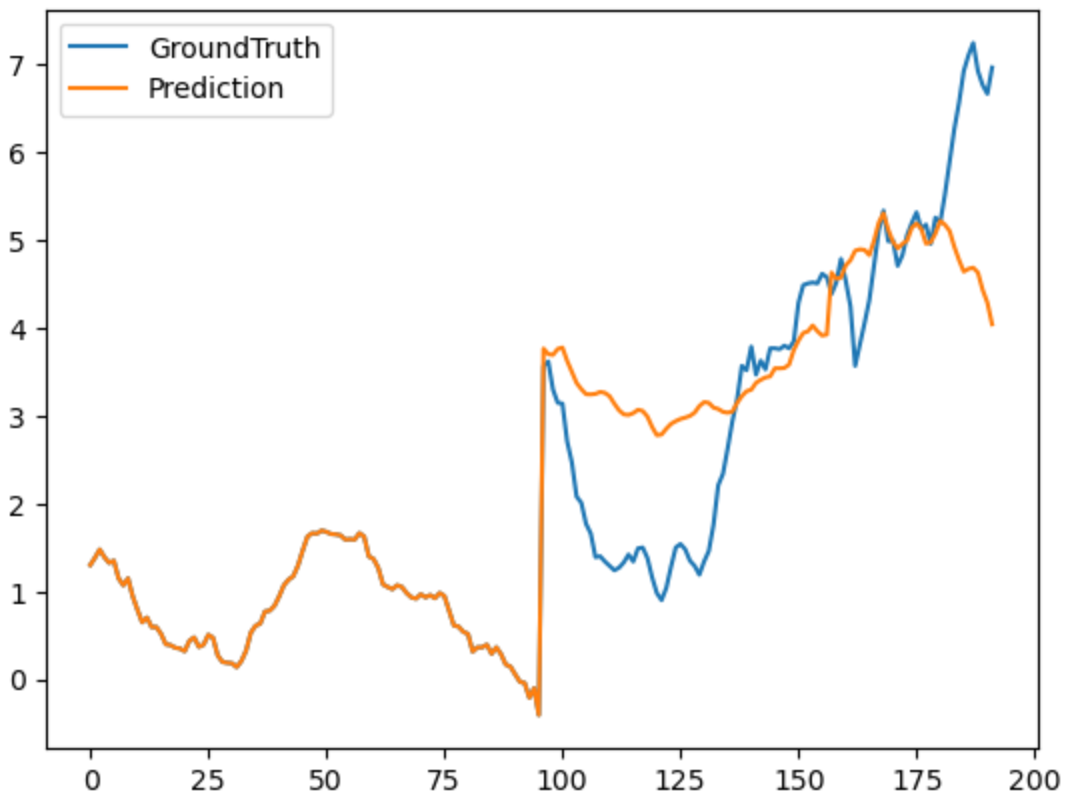

In [5]:
Image(filename='../../resources/img/transformer_pred.png', width=360) 

### 六、模型部署

*暂未支持非标准无封装算法/模型的在线服务部署，持续设计与开发中……*